# Análisis y Visualización de Texto con WordCloud

## Objetivo

El objetivo de este proyecto es construir un análisis de opiniones con un dataset que contiene:

* Opiniones con contenido positivo
* Opiniones con contenido negativo

Para ello se utiliza un corpus de texto. Se construye un WordCloud con estos datos preprocesando el texto previamente.

## Configuración del entorno

In [61]:
# In the cell with the imports, add these lines:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

%matplotlib inline

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import re

stopwords = stopwords.words('english')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/odremanferrer/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/odremanferrer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Carga de datos

En este caso las reviews etiquetadas se encuentran en un fichero txt (`reviews.txt`) que contiene una línea por cada review y tiene la siguiente estructura `(0|1)<TABULADOR>texto`:

In [62]:
reviews_pos = []
reviews_neg = []

with open('reviews.txt', 'r', encoding='utf-8') as file:
    for line in file:
        trozos = line.split('\t')
        
        if trozos[0] == '0':
            # Negativos
            reviews_neg.append(trozos[1].lower())
        elif trozos[0] == '1':
            # Positivos
            reviews_pos.append(trozos[1].lower())

In [63]:
print(reviews_pos[0:5])

['the da vinci code book is just awesome.\n', "this was the first clive cussler i've ever read, but even books like relic, and da vinci code were more plausible than this.\n", 'i liked the da vinci code a lot.\n', 'i liked the da vinci code a lot.\n', "i liked the da vinci code but it ultimatly didn't seem to hold it's own.\n"]


In [64]:
print(reviews_neg[0:5])

['da vinci code was a terrible movie.\n', 'then again, the da vinci code is super shitty movie, and it made like 700 million.\n', 'the da vinci code comes out tomorrow, which sucks.\n', 'i thought the da vinci code movie was really boring.\n', "god, yahoo games has this truly-awful looking da vinci code-themed skin on it's chessboard right now.\n"]


## Limpieza de signos
La primera función a implementar una función que nos filtre las reviews completas sin signos de puntuación:

In [65]:
def filtrar_review(review):
    review_limpia = ""
    '''
    Filtra un review devolviendo una review "limpio"
    '''
    
    #Eliminamos los signos de puntuación
    review_limpia=re.sub(r'[^\w\s]', '', review)
  
    return review_limpia

In [66]:
reviews_pos_filtradas = [filtrar_review(x) for x in reviews_pos]
print(reviews_pos_filtradas[0:5])

['the da vinci code book is just awesome\n', 'this was the first clive cussler ive ever read but even books like relic and da vinci code were more plausible than this\n', 'i liked the da vinci code a lot\n', 'i liked the da vinci code a lot\n', 'i liked the da vinci code but it ultimatly didnt seem to hold its own\n']


In [67]:
reviews_neg_filtradas = [filtrar_review(x) for x in reviews_neg]
print(reviews_neg_filtradas[0:5])

['da vinci code was a terrible movie\n', 'then again the da vinci code is super shitty movie and it made like 700 million\n', 'the da vinci code comes out tomorrow which sucks\n', 'i thought the da vinci code movie was really boring\n', 'god yahoo games has this trulyawful looking da vinci codethemed skin on its chessboard right now\n']


## Obtención de palabras
El siguiente paso de nuestro pipeline es convertir las reviews en palabras separadas:

In [74]:
def obtener_palabras(review):
    '''
    Realiza la separación en palabras de un review devolviendo una lista de palabras.
    '''
    # Handle empty or invalid input
    if not review or not isinstance(review, str):
        return []
        
    palabras_review = review.split()
    
    palabras_review = [word.strip() for word in palabras_review if word.strip()]
    
    return palabras_review

In [75]:
palabras_positivas = []
for t in reviews_pos_filtradas:
    palabras_positivas.extend(obtener_palabras(t))
    
print("palabras_positivas: " + str(len(palabras_positivas)))
print(palabras_positivas[0:50])

palabras_positivas: 41326
['the', 'da', 'vinci', 'code', 'book', 'is', 'just', 'awesome', 'this', 'was', 'the', 'first', 'clive', 'cussler', 'ive', 'ever', 'read', 'but', 'even', 'books', 'like', 'relic', 'and', 'da', 'vinci', 'code', 'were', 'more', 'plausible', 'than', 'this', 'i', 'liked', 'the', 'da', 'vinci', 'code', 'a', 'lot', 'i', 'liked', 'the', 'da', 'vinci', 'code', 'a', 'lot', 'i', 'liked', 'the']


In [76]:
palabras_negativas = []
for t in reviews_neg_filtradas:
    palabras_negativas.extend(obtener_palabras(t))
    
print("palabras_negativas: " + str(len(palabras_negativas)))
print(palabras_negativas[0:50])

palabras_negativas: 34562
['da', 'vinci', 'code', 'was', 'a', 'terrible', 'movie', 'then', 'again', 'the', 'da', 'vinci', 'code', 'is', 'super', 'shitty', 'movie', 'and', 'it', 'made', 'like', '700', 'million', 'the', 'da', 'vinci', 'code', 'comes', 'out', 'tomorrow', 'which', 'sucks', 'i', 'thought', 'the', 'da', 'vinci', 'code', 'movie', 'was', 'really', 'boring', 'god', 'yahoo', 'games', 'has', 'this', 'trulyawful', 'looking', 'da']


## Filtrar palabras
Una vez obtenidas las palabras debemos filtrar todas las palabras que no aporte información relevante al resultado.

In [78]:
def filtrar_palabras(palabras):
    ''' 
    Elimina de la lista de entrada las palabras no deseadas
    Devuelve una lista de palabras filtradas.
    '''
    out = []
    #Eliminamos las palabras que no son relevantes
    for palabra in palabras:
        if palabra not in stopwords:
            out.append(palabra)
    return out

In [88]:
palabras_positivas_filtradas = filtrar_palabras(palabras_positivas)

print("palabras_positivas_filtradas: " + str(len(palabras_positivas_filtradas)))
print(palabras_positivas_filtradas[0:50])

palabras_positivas_filtradas: 18116
['book', 'awesome', 'first', 'clive', 'cussler', 'ive', 'ever', 'read', 'even', 'books', 'like', 'relic', 'plausible', 'liked', 'lot', 'liked', 'lot', 'liked', 'ultimatly', 'didnt', 'seem', 'hold', 'thats', 'even', 'exaggeration', 'midnight', 'went', 'walmart', 'buy', 'amazing', 'course', 'loved', 'want', 'something', 'better', 'different', 'thought', 'great', 'kite', 'runner', 'actually', 'good', 'movie', 'thought', 'pretty', 'good', 'book', 'one', 'beautiful', 'movies']


In [89]:
palabras_negativas_filtradas = filtrar_palabras(palabras_negativas)

print("palabras_negativas_filtradas: " + str(len(palabras_negativas_filtradas)))
print(palabras_negativas_filtradas[0:50])

palabras_negativas_filtradas: 14705
['terrible', 'movie', 'super', 'shitty', 'movie', 'made', 'like', 'million', 'comes', 'tomorrow', 'sucks', 'thought', 'movie', 'really', 'boring', 'god', 'yahoo', 'games', 'trulyawful', 'looking', 'codethemed', 'skin', 'chessboard', 'right', 'suck', 'betterwe', 'know', 'bogus', 'inaccurate', 'last', 'time', 'also', 'bit', 'disappointing', 'many', 'things', 'written', 'book', 'never', 'mentioned', 'movie', 'betterwe', 'know', 'bogus', 'inaccurate', 'betterwe', 'know', 'bogus', 'inaccurate', 'betterwe']


## Wordclouds

Vamos a dar un primer vistazo a los resultados. Construye un wordcloud para sentimiento positivo, uno para sentimiento negativo y otro que combine ambos tipos de palabras. 

Recuerda que wordcloud espera que le pases las palabras separadas por espacios en una misma cadena. Para ello, ayúdate de `join`: `palabras_positivas_juntas = ' '.join(palabras_positivas)`

### Wordcloud de sentimientos positivos

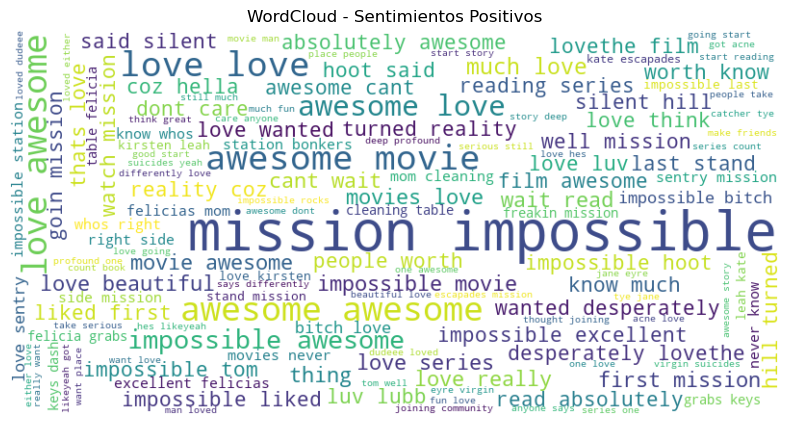

In [90]:
# Wordcloud de sentimientos positivos
palabras_positivas_texto = ' '.join(palabras_positivas_filtradas)

wordcloud_positivo = WordCloud(width=800, height=400,
                              background_color='white',
                              min_font_size=10).generate(palabras_positivas_texto)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positivo, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Sentimientos Positivos')
plt.show()

### Wordcloud de sentimientos negativos

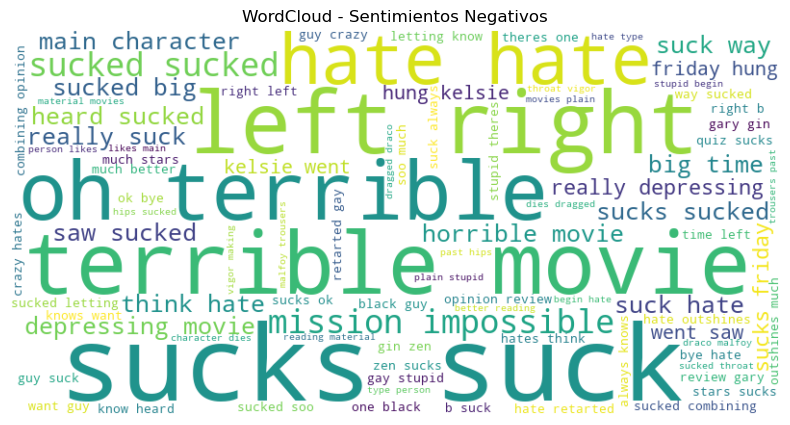

In [91]:
# Wordcloud de sentimientos negativos
palabras_negativas_texto = ' '.join(palabras_negativas_filtradas)

wordcloud_negativo = WordCloud(width=800, height=400,
                             background_color='white',
                             min_font_size=10).generate(palabras_negativas_texto)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negativo, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Sentimientos Negativos')
plt.show()

### Wordcloud de ambos sentimientos

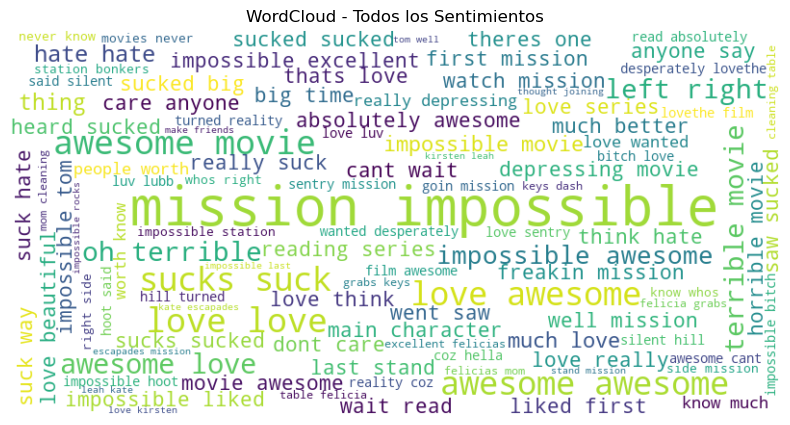

In [92]:
# Wordcloud combinado
palabras_combinadas = palabras_positivas_filtradas + palabras_negativas_filtradas
palabras_combinadas_texto = ' '.join(palabras_combinadas)

wordcloud_combinado = WordCloud(width=800, height=400,
                              background_color='white',
                              min_font_size=10).generate(palabras_combinadas_texto)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_combinado, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Todos los Sentimientos')
plt.show()

* ¿Qué te parecen los resultados?

  1.WordCloud Positivo:
     - Se destacan palabras como "love", "awesome", "impossible" (relacionada con "Mission Impossible"), "potter" (Harry Potter), etc.
    
     - Las películas más mencionadas positivamente son "Brokeback Mountain", "Da Vinci Code" y "Harry Potter"
    
     - Los sentimientos positivos se expresan con palabras como "beautiful", "excellent", "loved"

  2.WordCloud Negativo:
   - Aparecen palabras negativas fuertes como "suck", "hate", "terrible", "horrible"

   - Las mismas películas aparecen pero en contexto negativo
    
   - Hay más variedad de palabras negativas y son más explícitas

  3.WordCloud Combinado:
   - Muestra el dominio de ciertas películas/temas en el dataset
    
   - Permite ver la polarización de opiniones sobre las mismas obras

* ¿Qué crees que se podría mejorar?
  1. En el procesamiento:
     - Eliminar nombres propios comunes (da, vinci, harry, potter)
     - Combinar palabras similares (Ej: awesome/awesome!)
     - Unir n-gramas significativos (Ej: "da vinci" como una sola palabra)

  2. Análisis:
     - Separar nombres propios de palabras de sentimiento
     - Considerar el contexto de las palabras



In [87]:
# Lista de palabras a excluir específicas del dominio
exclude_words = ['da', 'vinci', 'code', 'harry', 'potter', 'mountain', 'brokeback']
   
def filtrar_palabras_mejorado(palabras):
    return [palabra for palabra in palabras 
        if palabra not in stopwords 
        and palabra not in exclude_words
        and not palabra.isdigit()]

## Análisis de frecuencias de reviews negativos y positivos
A partir de las palabras filtradas queremos el conjunto de palabras que nos muestre cuales son las más probables o frecuentes en cada categoría (reviews positivo o negativo).

In [107]:
def calcula_palabras_mas_probables(palabras, n):
    '''
    Devuelve un conjunto con las n palabras más probables
    '''
    # Crear un objeto FreqDist con las frecuencias de las palabras
    freq_dist = FreqDist(palabras)
    
    # Obtener las n palabras más frecuentes
    palabras_frecuentes = freq_dist.most_common(n)
    
    # Convertir a conjunto solo las palabras (sin las frecuencias)
    conjunto = set(palabra for palabra, freq in palabras_frecuentes)
    
    return conjunto

In [108]:
# Para encontrar palabras comunes entre positivas y negativas
def encontrar_palabras_comunes(conjunto_pos, conjunto_neg):
    '''
    Encuentra las palabras que aparecen en ambos conjuntos
    '''
    comunes = conjunto_pos.intersection(conjunto_neg)
    return comunes



In [109]:
conjunto_positivas = calcula_palabras_mas_probables(palabras_positivas_filtradas, 150)  

print("conjunto_positivas: " + str(len(conjunto_positivas)))
print(conjunto_positivas)

conjunto_positivas: 150
{'hoot', 'still', 'yeah', 'since', 'catcher', 'watch', 'friends', 'went', 'miss', 'much', 'book', 'worth', 'watched', 'mom', 'tell', 'acne', 'beautiful', 'best', 'thought', 'wait', 'things', 'though', 'even', 'great', 'movies', 'way', 'going', 'says', 'absolutely', 'think', 'desperately', 'bitch', 'lubb', 'acceptable', 'coz', 'kirsten', 'one', 'series', 'station', 'whos', 'freakin', 'last', 'good', 'dudeee', 'keys', 'place', 'right', 'dash', 'big', 'awesome', 'turned', 'cruise', 'liked', 'eyre', 'rocks', 'really', 'differently', 'enjoyed', 'people', 'im', 'gonna', 'better', 'community', 'jane', 'also', 'suicides', 'reality', 'either', 'bonkers', 'thing', 'excellent', 'side', 'hes', 'take', 'reading', 'luv', 'start', 'leah', 'lovethe', 'pretty', 'make', 'hill', 'theme', 'fun', 'felicias', 'see', 'kate', 'id', 'sentry', 'escapades', 'like', 'movie', 'cleaning', 'already', 'impossible', 'hella', 'two', 'joining', 'actually', 'virgin', 'hate', 'lot', 'count', 'man',

In [110]:
conjunto_negativas = calcula_palabras_mas_probables(palabras_negativas_filtradas, 150)    
    
print("conjunto_negativas: " + str(len(conjunto_negativas)))
print(conjunto_negativas)

conjunto_negativas: 150
{'still', 'watch', 'went', 'much', 'book', 'around', 'kelsie', 'noises', 'thought', 'even', 'though', 'outshines', 'begin', 'stars', 'things', 'suck', 'movies', 'rockhard', 'way', 'gary', 'going', 'evil', 'absolutely', 'think', 'new', 'reminded', 'panting', 'one', 'whimpering', 'hates', 'gay', 'good', 'heard', 'head', 'wotshisface', 'dads', 'hated', 'bye', 'right', 'big', 'quiz', 'hips', 'past', 'cruise', 'ive', 'second', 'really', 'malfoy', 'letting', 'trousers', 'throat', 'people', 'im', 'guy', 'depressing', 'better', 'sucked', 'always', 'aching', 'also', 'ass', 'draco', 'laughed', 'dies', 'theres', 'snuck', 'seen', 'crazy', 'soo', 'type', 'watching', 'made', 'awful', 'blonds', 'time', 'reading', 'gin', 'pretty', 'material', 'friday', 'zen', 'hat', 'see', 'retarted', 'mtv', 'like', 'movie', 'balls', 'impossible', 'groaning', 'cock', 'ok', 'hate', 'may', 'awards', 'man', 'didnt', 'cool', 'hung', 'terrible', 'horrible', 'iii', 'review', 'slap', 'first', 'opinion

### ¿Se te ocurre cómo mejorarlo?
Como ves existen muchas palabras parecidas, o directamente las mismas, ¿se te ocurre cómo podríamos mejorarlo?. Por ejemplo, podríamos eliminar esas palabras comunes de ambos conjuntos, ya que no aportan nada.

**¡CUIDADO!** Palabras comunes no es lo mismo que palabras frecuentes. Las palabras comunes aparecen en ambos conjuntos, aunque sólo sea una única vez. Las frecuentes, aparecen muchas veces en cualquiera de los dos conjuntos.

In [99]:

comunes = encontrar_palabras_comunes(conjunto_positivas, conjunto_negativas)
print(comunes)

{'still', 'go', 'pretty', 'watch', 'went', 'want', 'read', 'much', 'book', 'cruise', 'oh', 'know', 'tom', 'really', 'would', 'people', 'see', 'get', 'im', 'said', 'thought', 'better', 'even', 'though', 'things', 'like', 'movie', 'love', 'movies', 'impossible', 'way', 'going', 'also', 'well', 'absolutely', 'think', 'hate', 'man', 'one', 'dont', 'good', 'iii', 'ever', 'first', 'saw', 'say', 'film', 'mission', 'right', 'reading', 'big'}


Una vez tenemos las palabras comunes, podemos aplicarlo a los conjuntos tal y como hemos hecho con el resto de transformaciones.

In [111]:
def quitar_comunes(words, comunes):
    '''
    Elimina las palabras comunes del conjunto de palabras
    '''
    return [palabra for palabra in words if palabra not in comunes]

In [104]:
conjunto_positivas_filtradas = quitar_comunes(conjunto_positivas, comunes)
print("conjunto_positivas_filtradas: ", str(conjunto_positivas_filtradas))

conjunto_positivas_filtradas:  ['hoot', 'yeah', 'since', 'catcher', 'friends', 'miss', 'worth', 'watched', 'mom', 'tell', 'acne', 'beautiful', 'best', 'wait', 'great', 'says', 'desperately', 'bitch', 'lubb', 'acceptable', 'coz', 'kirsten', 'series', 'station', 'whos', 'freakin', 'last', 'dudeee', 'keys', 'place', 'dash', 'awesome', 'turned', 'liked', 'eyre', 'rocks', 'differently', 'enjoyed', 'gonna', 'community', 'jane', 'suicides', 'reality', 'either', 'bonkers', 'thing', 'excellent', 'side', 'hes', 'take', 'luv', 'start', 'leah', 'lovethe', 'make', 'hill', 'theme', 'fun', 'felicias', 'kate', 'id', 'sentry', 'escapades', 'cleaning', 'already', 'hella', 'two', 'joining', 'actually', 'virgin', 'lot', 'count', 'likeyeah', 'story', 'table', 'got', 'anyone', 'books', 'thats', 'anyway', 'amazing', 'felicia', 'silent', 'deep', 'serious', 'tye', 'grabs', 'never', 'loved', 'enjoy', 'cant', 'stand', 'profound', 'homosexuality', 'far', 'wanted', 'becoming', 'care', 'goin']


In [105]:
conjunto_negativas_filtradas = quitar_comunes(conjunto_negativas, comunes)
print("conjunto_negativas_filtradas: ", str(conjunto_negativas_filtradas))

conjunto_negativas_filtradas:  ['around', 'kelsie', 'noises', 'outshines', 'begin', 'stars', 'suck', 'rockhard', 'gary', 'evil', 'new', 'reminded', 'panting', 'whimpering', 'hates', 'gay', 'heard', 'head', 'wotshisface', 'dads', 'hated', 'bye', 'quiz', 'hips', 'past', 'ive', 'second', 'malfoy', 'letting', 'trousers', 'throat', 'guy', 'depressing', 'sucked', 'always', 'aching', 'ass', 'draco', 'laughed', 'dies', 'theres', 'snuck', 'seen', 'crazy', 'soo', 'type', 'watching', 'made', 'awful', 'blonds', 'time', 'gin', 'material', 'friday', 'zen', 'hat', 'retarted', 'mtv', 'balls', 'groaning', 'cock', 'ok', 'may', 'awards', 'didnt', 'cool', 'hung', 'terrible', 'horrible', 'review', 'slap', 'opinion', 'combining', 'likes', 'cowboy', 'b', 'vigor', 'plain', 'black', 'dragged', 'stupid', 'left', 'person', 'daniel', 'character', 'sit', 'bobbypin', 'needs', 'insanely', 'main', 'despised', 'making', 'boring', 'helped', 'knows', 'fucking', 'kinda', 'jokes', 'sucks']


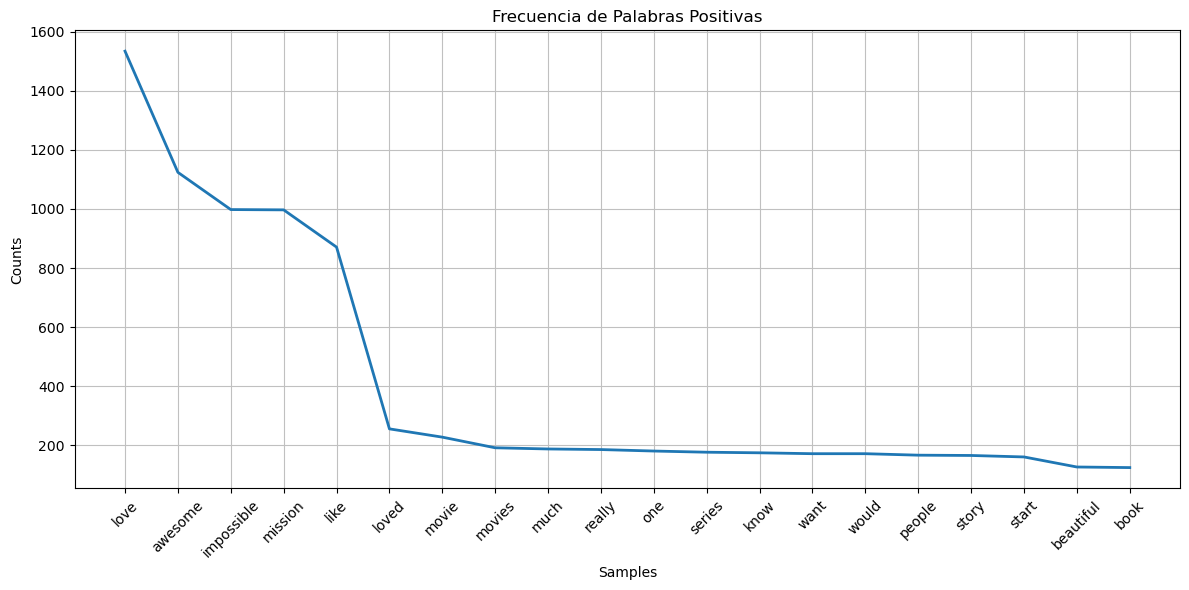

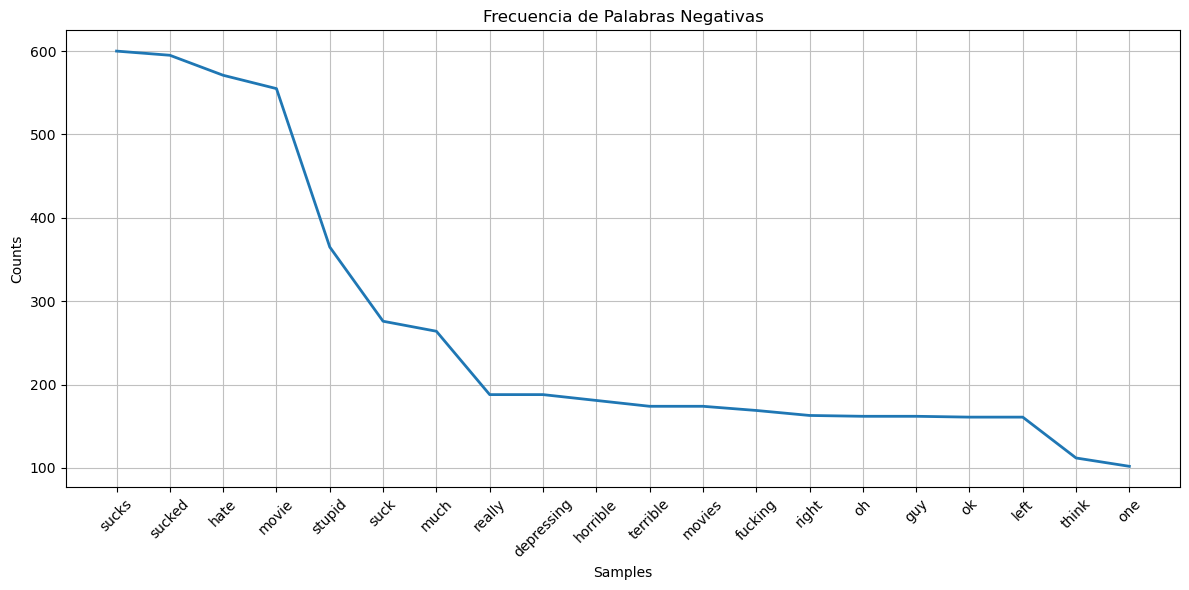

In [106]:
# Para visualizar las frecuencias, podemos crear un gráfico
def plot_frecuencias(palabras, titulo, n=20):
    freq_dist = FreqDist(palabras)
    plt.figure(figsize=(12, 6))
    freq_dist.plot(n, title=titulo)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Visualizar las frecuencias
plot_frecuencias(palabras_positivas_filtradas, "Frecuencia de Palabras Positivas")
plot_frecuencias(palabras_negativas_filtradas, "Frecuencia de Palabras Negativas")

###  Punto extra: histogramas

Construye histogramas para cada uno de los casos anteriores y compara si tiene sentido lo que se muestra.

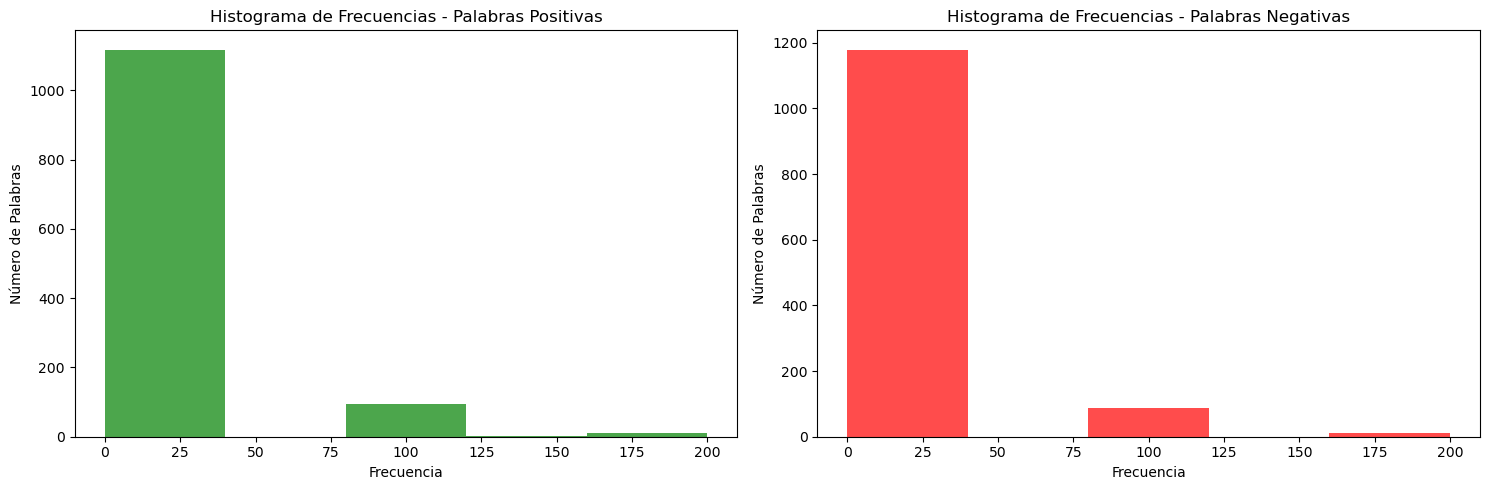

Estadísticas de palabras positivas:
Total de palabras únicas: 1232
Media de frecuencia: 14.70
Mediana de frecuencia: 1.00
Desviación estándar: 76.80
Palabra más frecuente: ('love', 1534)

Estadísticas de palabras negativas:
Total de palabras únicas: 1286
Media de frecuencia: 11.43
Mediana de frecuencia: 1.00
Desviación estándar: 43.28
Palabra más frecuente: ('sucks', 600)


In [116]:
def crear_histogramas(palabras_pos, palabras_neg):
    # Calcular frecuencias
    freq_pos = FreqDist(palabras_pos)
    freq_neg = FreqDist(palabras_neg)
    
    # Crear figura con dos subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Histograma para palabras positivas
    frecuencias_pos = list(freq_pos.values())
    # Ajustamos los bins y limitamos el rango del eje x para mejor visualización
    ax1.hist(frecuencias_pos, bins=5, color='green', alpha=0.7, range=(0, 200))
    ax1.set_title('Histograma de Frecuencias - Palabras Positivas')
    ax1.set_xlabel('Frecuencia')
    ax1.set_ylabel('Número de Palabras')
    
    # Histograma para palabras negativas
    frecuencias_neg = list(freq_neg.values())
    # Ajustamos los bins y limitamos el rango del eje x para mejor visualización
    ax2.hist(frecuencias_neg, bins=5, color='red', alpha=0.7, range=(0, 200))
    ax2.set_title('Histograma de Frecuencias - Palabras Negativas')
    ax2.set_xlabel('Frecuencia')
    ax2.set_ylabel('Número de Palabras')
    
    plt.tight_layout()
    plt.show()
    
    # Mostrar estadísticas más detalladas
    print("Estadísticas de palabras positivas:")
    print(f"Total de palabras únicas: {len(freq_pos)}")
    print(f"Media de frecuencia: {np.mean(frecuencias_pos):.2f}")
    print(f"Mediana de frecuencia: {np.median(frecuencias_pos):.2f}")
    print(f"Desviación estándar: {np.std(frecuencias_pos):.2f}")
    print(f"Palabra más frecuente: {freq_pos.most_common(1)[0]}")
    
    print("\nEstadísticas de palabras negativas:")
    print(f"Total de palabras únicas: {len(freq_neg)}")
    print(f"Media de frecuencia: {np.mean(frecuencias_neg):.2f}")
    print(f"Mediana de frecuencia: {np.median(frecuencias_neg):.2f}")
    print(f"Desviación estándar: {np.std(frecuencias_neg):.2f}")
    print(f"Palabra más frecuente: {freq_neg.most_common(1)[0]}")

# Crear los histogramas
crear_histogramas(palabras_positivas_filtradas, palabras_negativas_filtradas)

## Conclusiones

* ¿Qué otras técnicas habrías aplicado?
     - Buscando un poco de información encontré que quizás podria usar:
        - Análisis de sentimientos usando bibliotecas especializadas (NLTK Sentiment o TextBlob)
        - Lematización para reducir palabras a su raíz
        - Análisis de n-gramas para capturar frases completas
        - Técnicas de Machine Learning para clasificación automática

  
* ¿Cuál crees que sería el siguiente paso?
     - Al igual que el anterior, Buscando información encontré que quizás podria usar:
        - Implementar un clasificador automático de sentimientos
        - Crear un sistema de puntuación para medir la intensidad del sentimiento
        - Validar el modelo con nuevos datos
